# Homework 4

## Part I: Sentiment Analysis for Movie Reviews

Sentiment analysis is a hot topic in data science right now due to the immense amount of user-generated text data being created every day online.  Businesses can now look at what is being said about them on review sites to get an idea of how well they are liked, how much they are disliked, and what they can do to improve.  While most of this data is unlabeled, some sites also ask users to provide a numerical or star rating.  This allows us to build a classifier for positive/negative reviews using the star rating as a label, which could then be hypothetically applied to unlabeled text.

IMDB collects information about movies and lets users write their own reviews, as well as provide a 1-10 numerical rating.   The data for this assignment can be found in 'IMDB_TRAIN.csv' and IMDB_TEST.csv', the training and test data respectively. It consists of thousands of positive and negative reviews collected from IMDB.  The ratings have been binarized by labeling anything with score between 7 and 10 as “P” and anything between 1 and 4 with “N” (there are no “neutral” reviews in the data).  You will build and evaluate a system that classifies these movie reviews as positive or negative.

__1. Load the training data and the test data. No points for this.__

In [56]:
!pip install nltk

In [57]:
import nltk

In [58]:
nltk.download

<bound method Downloader.download of <nltk.downloader.Downloader object at 0x000001C2C50EBA90>>

In [59]:
import pandas as pd

# Remember to change this to the path of your files.
train_path = 'C:/Users/UTKARSH/IMDB_TRAIN.csv'
test_path = 'C:/Users/UTKARSH//IMDB_TEST.csv'

columns = ['text', 'class']
df_imdb_train = pd.read_csv(train_path, names=columns)
df_imdb_test = pd.read_csv(test_path, names=columns)
df_imdb_train.head()

,text,class
0,'If you hit your teens in the 70s as I did you...,N
1,'Excellent endearing film with Peter Falk and ...,P
2,'Oh dear what a horrid movie. The production w...,N
3,'This is a terrible production of Bartleby tho...,N
4,'I actually have a fondness for Christopher Le...,N


In [60]:
df_imdb_test.head()

,text,class
0,'One of the first of the best musicals Anchors...,P
1,'Visually disjointed and full of itself the di...,N
2,'These type of movies about young teenagers st...,P
3,'I would rather of had my eyes gouged out with...,N
4,'The title says it all. Tail Gunner Joe was a ...,N


In [61]:
replacement = {
     'P' : 1,
     'N' : 0
}
df_imdb_test['class'].replace(replacement, inplace=True)
print(df_imdb_test['class'])
df_imdb_train['class'].replace(replacement, inplace=True)
print(df_imdb_train['class'])

0       1.0
1       0.0
2       1.0
3       0.0
4       0.0
5       1.0
6       0.0
7       0.0
8       1.0
9       1.0
10      0.0
11      1.0
12      0.0
13      0.0
14      0.0
15      1.0
16      0.0
17      0.0
18      0.0
19      1.0
20      1.0
21      1.0
22      1.0
23      0.0
24      1.0
25      1.0
26      0.0
27      1.0
28      0.0
29      0.0
       ... 
8470    0.0
8471    1.0
8472    0.0
8473    1.0
8474    1.0
8475    0.0
8476    0.0
8477    0.0
8478    1.0
8479    0.0
8480    0.0
8481    1.0
8482    1.0
8483    1.0
8484    0.0
8485    0.0
8486    1.0
8487    0.0
8488    0.0
8489    1.0
8490    0.0
8491    1.0
8492    0.0
8493    1.0
8494    0.0
8495    0.0
8496    0.0
8497    0.0
8498    0.0
8499    0.0
Name: class, Length: 8500, dtype: float64
0        0
1        1
2        0
3        0
4        0
5        1
6        0
7        0
8        0
9        1
10       0
11       0
12       0
13       0
14       1
15       1
16       1
17       0
18       1
19       1
20    

In [62]:
from sklearn.feature_extraction.text import CountVectorizer

s1 = "If you hit your teens in the 70s as I did you probably remember the stories about Studio 54 whether or not you liked disco. An exclusive club it was the perfect symbol of 70s cultural overindulgence and self-absorption; theres even an excellent VH1 documentary about the club that could tell you everything you wanted to know about its heyday and the stories are easily interesting enough to spawn a very captivating film. Sadly this isnt it. 54 follows the lives of a few of its employees a bartender named Shane (Ryan Phillippe) a busboy named Greg (Breckin Meyer) his wife a coat-check girl Anita (Selma Hayek) and of course the master of ceremonies himself Steve Rubell (Mike Meyers). While the goings-on at the club are well represented this film concerns itself more with the personal lives of the workers following Shanes story the closest. The movie works in spurts. Sometimes it captures perfectly the shallowness of the nightlife culture (such as when Shane is taken to a dinner party and doesnt know who Errol Flynt is) and other times it waxes into hokey melodrama. Some of that is inherent in the premise Â– following the underlings as they mingle in the world of the rich and fabulous Â– but a lot of it is due to the kid-gloved treatment with which both the club and Rubell are given throughout the movie. While Rubell certainly electrified the scene in New York with his penchant for over-the-top spectacle and his exclusive hand-picking of the crowds each night the rampant drugs and sexuality are only briefly touched on; and Rubell himself while his excesses are mentioned come off oddly positive for a guy who was in life a liar a cheat a drug abuser and promiscuous as all hell. Not that I was looking for the man to be pilloried here but his ego directly contributed to the fall of his club and the diminishing of the nightlife culture he helped to elevate. A final scene where he gazes down at the regulars paternally is so emotionally false as to be patently absurd. Meyers does his best to capture Rubell but hes given so little to work with here its surprising his performance is effective; but hes good and he helps to anchor the film. Philippe whom I find generally to be a good actor is hamstrung here by the shallowness and stupidity of his character; hes limited to a deer-in-the-headlights smile or a sullen uncomprehending frown and even he cant translate that into a strong performance. Hayek and Meyer are both okay again undercut by the writing and Neve Campbell Â– prominently featured on the DVD cover Â– appears so briefly she really has an extended cameo. For some reason I still find myself interested even fascinated by the popular culture of the second half of the seventies. But even given that this is not a film that particularly engaged me despite a predisposition to like it. Id say if that era or that club has any interest for you track down the VH1 special rather than this middle-of-the-road melodrama."
s2 = "Excellent endearing film with Peter Falk and Paul Reiser joining forces as father and dad. Dad shows up one evening to state that after over 40 years of marriage mom (Olympia Dukakis) has left him. The rest of the film depicts the father and son on a day trip to get dads thoughts off what has occurred. With them away the daughters can play detectives. The story shows the adventures of father and son in their discussion of life what should have been why mom was complaining about dad as they discuss their philosophies of life. We see an unexpected fishing trip and pool playing which leads to a near brawl. Both men seem to break out of their daily lives. The end is a downer as we learn why mom suddenly left. It becomes a story of courage and the human spirit in the face of adversity. Its never too late to change."

vect = CountVectorizer(binary=True)
X_train = vect.fit_transform([s1, s2])

X_train.toarray()
#checking sample input #

array([[0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
        0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
        1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 

In [63]:
list(zip(X_train.toarray()[0], vect.get_feature_names()))

[(0, '40'),
 (1, '54'),
 (1, '70s'),
 (1, 'about'),
 (1, 'absorption'),
 (1, 'absurd'),
 (1, 'abuser'),
 (1, 'actor'),
 (0, 'adventures'),
 (0, 'adversity'),
 (0, 'after'),
 (1, 'again'),
 (1, 'all'),
 (1, 'an'),
 (1, 'anchor'),
 (1, 'and'),
 (1, 'anita'),
 (1, 'any'),
 (1, 'appears'),
 (1, 'are'),
 (1, 'as'),
 (1, 'at'),
 (0, 'away'),
 (1, 'bartender'),
 (1, 'be'),
 (0, 'becomes'),
 (0, 'been'),
 (1, 'best'),
 (1, 'both'),
 (0, 'brawl'),
 (0, 'break'),
 (1, 'breckin'),
 (1, 'briefly'),
 (1, 'busboy'),
 (1, 'but'),
 (1, 'by'),
 (1, 'cameo'),
 (1, 'campbell'),
 (0, 'can'),
 (1, 'cant'),
 (1, 'captivating'),
 (1, 'capture'),
 (1, 'captures'),
 (1, 'ceremonies'),
 (1, 'certainly'),
 (0, 'change'),
 (1, 'character'),
 (1, 'cheat'),
 (1, 'check'),
 (1, 'closest'),
 (1, 'club'),
 (1, 'coat'),
 (1, 'come'),
 (0, 'complaining'),
 (1, 'concerns'),
 (1, 'contributed'),
 (1, 'could'),
 (0, 'courage'),
 (1, 'course'),
 (1, 'cover'),
 (1, 'crowds'),
 (1, 'cultural'),
 (1, 'culture'),
 (0, 'dad'),
 

In [64]:
list(zip(X_train.toarray()[1], vect.get_feature_names()))

[(1, '40'),
 (0, '54'),
 (0, '70s'),
 (1, 'about'),
 (0, 'absorption'),
 (0, 'absurd'),
 (0, 'abuser'),
 (0, 'actor'),
 (1, 'adventures'),
 (1, 'adversity'),
 (1, 'after'),
 (0, 'again'),
 (0, 'all'),
 (1, 'an'),
 (0, 'anchor'),
 (1, 'and'),
 (0, 'anita'),
 (0, 'any'),
 (0, 'appears'),
 (0, 'are'),
 (1, 'as'),
 (0, 'at'),
 (1, 'away'),
 (0, 'bartender'),
 (0, 'be'),
 (1, 'becomes'),
 (1, 'been'),
 (0, 'best'),
 (1, 'both'),
 (1, 'brawl'),
 (1, 'break'),
 (0, 'breckin'),
 (0, 'briefly'),
 (0, 'busboy'),
 (0, 'but'),
 (0, 'by'),
 (0, 'cameo'),
 (0, 'campbell'),
 (1, 'can'),
 (0, 'cant'),
 (0, 'captivating'),
 (0, 'capture'),
 (0, 'captures'),
 (0, 'ceremonies'),
 (0, 'certainly'),
 (1, 'change'),
 (0, 'character'),
 (0, 'cheat'),
 (0, 'check'),
 (0, 'closest'),
 (0, 'club'),
 (0, 'coat'),
 (0, 'come'),
 (1, 'complaining'),
 (0, 'concerns'),
 (0, 'contributed'),
 (0, 'could'),
 (1, 'courage'),
 (0, 'course'),
 (0, 'cover'),
 (0, 'crowds'),
 (0, 'cultural'),
 (0, 'culture'),
 (1, 'dad'),
 

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Product.values, yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


#higher the sum of the diagonal values better is the performance of the model, in this case we pbserve that our diagonal values are 
#quite high, which indicates a very good accuracy of the model
# the sum of the off-diagonal values on the other hand indicate error rate which is very low for our model hence this is a prett accurate model.

In [65]:
vect = CountVectorizer(max_features=1000, binary=True)
X_train = vect.fit_transform(df_imdb_train.text)

X_train.toarray()

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [66]:
X_train = df_imdb_train['text']
y_train = df_imdb_train['class']
X_test = df_imdb_test['text'] 
y_test = df_imdb_test['class'] 

In [67]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(max_features=1000, binary=True)

X_train_vect = vect.fit_transform(X_train)

In [68]:
counts = df_imdb_train['class'].value_counts()
print(counts)

print("\nPredicting only positive = {:.2f}% accuracy".format(counts[1] / sum(counts) * 100))

1    12500
0    12500
Name: class, dtype: int64

Predicting only positive = 50.00% accuracy


In [69]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

nb.fit(X_train_vect, y_train)

nb.score(X_train_vect, y_train)

0.83368

In [70]:
X_test_vect = vect.transform(X_test)

y_pred = nb.predict(X_test_vect)

y_pred

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [71]:
Y_test = y_test.values.astype(int)
print(type(Y_test))


<class 'numpy.ndarray'>


In [72]:
print(Y_test)

[1 0 1 ... 0 0 0]


In [73]:
from sklearn.metrics import accuracy_score

print("Accuracy: {:.2f}%".format(accuracy_score(Y_test, y_pred) * 100))


Accuracy: 83.13%


__2. Build a Bernoulli Naive Bayes model to classify reviews according to their sentiment using a binary count vectorizer (check out the text mining module in the class notebooks if you do not know what this question is talking about). Test its accuracy on the test data. Is it good compared to just predicting a positive sentiment for all reviews?__

In [23]:
#Predicting only positive = 50.00% accuracy but actual accuracy is 83.13% hence it's not a good idea to just compare the postive sentiments

__3. Pick a few reviews in the test set that were incorrectly classified and read them through.  Are there any words in these misclassified reviews that may have misled the classifier?  Explain with at least three examples for each type of error (i.e., false positive and false negative).__
* For example: Instance number X contains the sentence, “Even her worst . . . I will stop here to avoid the spoiler.”  Even though this is actually positive, it was classified as a negative review; I would guess that this is due to the word “worst” in the review.

In [226]:
y_pred[:30]

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

In [227]:
Y_test[:30]

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0])

In [228]:
X_test[:30]

0     'One of the first of the best musicals Anchors...
1     'Visually disjointed and full of itself the di...
2     'These type of movies about young teenagers st...
3     'I would rather of had my eyes gouged out with...
4     'The title says it all. Tail Gunner Joe was a ...
5     'There is no greater disservice to do to histo...
6     'National Lampoon Goes to the Movies (1981) is...
7     'I rented this on DVD yesterday and did not re...
8     'Midnight Cowboy is one of those films thats b...
9     'Its not a big film. The acting is not amazing...
10    'Carlito Way the original is a brilliant story...
11    'I really enjoyed Doctor Mordrid. This is a lo...
12    'When I rented this movie I had very low expec...
13    'Imagine the scenario - you are at the movie t...
14    'This is a film that takes some digesting. On ...
15    'I appreciate movies like this: smart and well...
16    'When I read the summary of the movie somethin...
17    'Near the beginning after its been establi

In [ ]:
# 1.'I really enjoyed Doctor Mordrid. index 11 it an example of false negative
# 2.'A surprisingly good movie! index 27 it is a example of false negative
#3.'The title says it all. 5th element false postive


In [ ]:
# false negative
#A surprisingly good movie! It has quite a few good jokes thru out the whole movie. 
#The only negative thing is that some scenes go to the extremes to show just how stupid the two main characters are.
#We get it stupid blondes get on with it!  
#The plot just barely dodges being called corny. 
#And boobies are always a plus altho the movie for some strange reason doesnt play with that card very much
#even tho the plot line introduces two black haired women who act as the evil counter part of our two blondes. 
#So all in all a good movie to watch. I almost gave it an 8/10 but lets not get crazy.'

#eventhough this is positive review it uses 'almost, 'the', 'movie' which may have resulted to being predicted otherwise

In [ ]:
# false postive
#The title says it all. Tail Gunner Joe was a tag given to the Senator which relied upon 
#the ignorance of the public about World War II aircraft. 
#The rear facing moving guns relied upon a latch that would prevent the rear gunner 
#from shooting off the tail of the airplane by preventing the gun from firing when it pointed at the tail.
#When the Senator was practicing on the ground one day he succeeded in shooting off the tail of the airplane.
#He couldnt have done that if the gun had been properly aligned. 
#The gunnery officer responsible for that admitted in public before a camera that he was responsible 
#-- he had made the error not the Senator. The fact that the film did not report that fact shows how one-sided it is.
#This film was designed to do one thing destroy the reputation of a complex person. 
#A much better program was the PBS special done on him. 
#He was a hard working intelligent ambitious politician who overcame extraordinary disadvantages to rise to 
#extraordinary heights. He made some mistakes some serious mistakes but shooting the tail off an airplane was not one of them.
#The popularity of this film is due to the fact that the public likes simple stories 
#one=sided stories so that they dont have to think.'

#use of words like  very, 'the', 'they' may have led the classifier to predict otherwise

__4. Improve the accuracy of your model on the test data. Try at least two of the following to do this:__
* __Use a non-binary count vectorizer or a tf-idf count vectorizer.__
* __Use n-grams.__
* __Remove stopwords.__

__If you want, you can try other classifiers besides Bernoulli Naive Bayes.__

In [74]:
# Your answer here.
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)
X_train = df_imdb_train['text']
y_train = df_imdb_train['class']
X_test = df_imdb_test['text'] 
y_test = df_imdb_test['class']

In [75]:
Y_test = y_test.values.astype(int)



In [76]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)


y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, Y_test))

accuracy 0.9081176470588235


In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
# Fit a counter
ngram_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
ngram_vectorizer.fit(X_train)

# Transform to a counter
X_train_ngram = ngram_vectorizer.transform(X_train)
X_test_ngram = ngram_vectorizer.transform(X_test)

# Model
model_ngram = MultinomialNB()
model_ngram.fit(X_train_ngram, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Part II: Multi-Class Text Classification

There are lots of applications of text classification in the commercial world. For example, news stories are typically organized by topics; content or products are often tagged by categories; users can be classified into cohorts based on how they talk about a product or brand online. 

Suppose you've been hired by a finance institution that wants to classify incoming consumer complaints in product categories in order to forward them to the most appropriate customer support agents. You have a sample of the complaints that have been addressed in the past, each of them labeled as one category by the agent that addressed the complaint. Each complaint is assigned to one and only one category. 

Let's take a look at the data.

__1. Load the data. No points for this.__

In [40]:
# Remember to change this to the path of your file.
complaints_path = 'C:/Users/UTKARSH/complaints_sample.csv'

data = pd.read_csv(complaints_path)
data.head()

,Consumer complaint narrative,Product
0,This is not a duplicate case. Please escalate ...,Credit card or prepaid card
1,I reported the problem to Money gram agent. wo...,"Money transfer, virtual currency, or money ser..."
2,"Medical debt is not mine, debt is my sons who ...",Debt collection
3,"Someone called me yesterday morning, XX/XX/201...",Debt collection
4,This is a debt with Conn 's - I am not 30 days...,Debt collection


__2. Print how many complaints there are for each product category.__

In [27]:
# Your answer here.
data.Product.value_counts()

Credit reporting, credit repair services, or other personal consumer reports    24401
Debt collection                                                                 17065
Mortgage                                                                        10552
Credit card or prepaid card                                                      8333
Student loan                                                                     4184
Bank account or service                                                          2985
Checking or savings account                                                      2485
Consumer Loan                                                                    1868
Money transfer, virtual currency, or money service                               1345
Payday loan, title loan, or personal loan                                        1223
Vehicle loan or lease                                                            1134
Name: Product, dtype: int64

__3. Split the data into a training and a test set. Build a logistic regression model to classify complaints according to product categories. Report its accuracy when applied to the test set. Why is this number relatively low compared to the binary accuracy in Part I? HINT: You may want to use [factorize](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.factorize.html) to transform the target variable into a categorical variable. Take a look at the sample code below.__

In [41]:
from io import StringIO
col = ['Product', 'Consumer complaint narrative']
data = data[col]
data = data[pd.notnull(data['Consumer complaint narrative'])]
data.columns = ['Product', 'Consumer_complaint_narrative']
data['category_id'], unique_prod = data['Product'].factorize()
#category_id_df = data[['Product', 'category_id']].drop_duplicates().sort_values('category_id') #unique values
#category_to_id = dict(category_id_df.values) # labels which are unique
#id_to_category = dict(category_id_df[['category_id', 'Product']].values)
data.head()

,Product,Consumer_complaint_narrative,category_id
0,Credit card or prepaid card,This is not a duplicate case. Please escalate ...,0
1,"Money transfer, virtual currency, or money ser...",I reported the problem to Money gram agent. wo...,1
2,Debt collection,"Medical debt is not mine, debt is my sons who ...",2
3,Debt collection,"Someone called me yesterday morning, XX/XX/201...",2
4,Debt collection,This is a debt with Conn 's - I am not 30 days...,2


In [12]:
#Naive Bayes also assumes that the features are conditionally independent. 
#Real data sets are never perfectly independent but they can be close. 
#In short Naive Bayes has a higher bias but lower variance compared to logistic regression. 
#If the data set follows the bias then Naive Bayes will be a better classifier. 

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
data.groupby('Product').Consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

# here we observe that the complaints are highly imbalanced towards credit reporting, debt collection, mortgage # 

<Figure size 800x600 with 1 Axes>

In [42]:
def print_plot(index):
    example = data[data.index == index][['Product', 'Consumer_complaint_narrative']].values[0]
    if len(example) > 0:
        print(example[0])
        print('prod:', example[1])
print_plot(10)

Credit reporting, credit repair services, or other personal consumer reports








Sincerely XXXX XXXX XXXX Witness : XXXX XXXX Witness : XXXX XXXX


In [43]:
# text cleaning and preprocessing#
import nltk
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup


REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwords from text
    return text
    
data['Consumer_complaint_narrative'] = data['Consumer_complaint_narrative'].apply(clean_text)
print_plot(10)

Credit reporting, credit repair services, or other personal consumer reports
prod: xx xx 2018 xxxx xxxx xxxx xxxx xxxx xxxx xxxx xxxx ga xxxx xxxx transunion xxxx fraudulent accounts unauthorized inquiries may concern informed internal dispute affidavit recently received copy credit report discovered inquiries didnt authorize along fraudulent accounts understand aware put inquiry file unless approved consent taking close look credit report notice many errors behalf company understand involved breaches cause credit info leaked xxxx companies recently filed police report company negligence currently working investigator stop use name someone stolen identity please following inquiries error accounts removed credit file immediately authorized fraudulentlist fraudulent accounts 1 xxxx xxxx xxxx 2 xxxx xxxx xxxx 3 xxxx xxxx xxxx 4 xxxx xxxx xxxx 5 xxxx xxxx xxxx 6 xxxx xxxx xxxx xxxx 7xxxx xxxx xxxx xxxx 8 xxxx xxxx xxxx 9 xxxx xxxx xxxx xxxx inquiries uploaded attachmentsalso advised fair c

In [44]:
data['Consumer_complaint_narrative'].apply(lambda x: len(x.split(' '))).sum()

7659047

In [45]:
from sklearn.model_selection import train_test_split

X = data.Consumer_complaint_narrative
y = data.category_id

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', LogisticRegression()),
              ])
nb.fit(X_train, y_train)


y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


accuracy 0.7975521005623553


__4. Make a confusion matrix that shows the errors made by your model. Use the test set labels and your predictions for the test set to build the matrix. Plot the confusion matrix using a Seaborn heatmap. What would perfect predictions look like? Give an example of one systematic type of error that you see. How can you tell that this is a systematic error? Why do you think such errors occur? HINT: Below there is code building and plotting a confusion matrix using the entire data and random predictions. The code removes the diagonal to highlight prediction errors.__

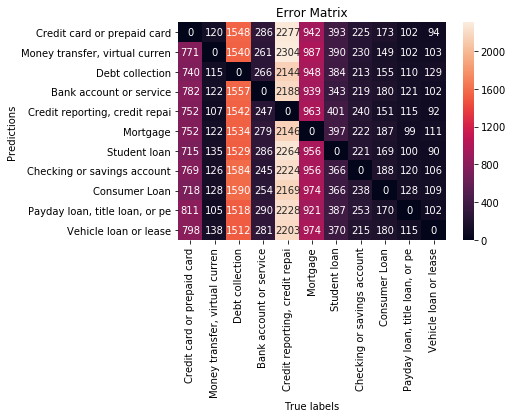

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt


tick_labels = [c[:30] for c in unique_prod]
def plot_matrix(mat, title, remove_diagonal=True):
    error_mat = mat.copy()
    if remove_diagonal:
        diag_ixs = np.arange(mat.shape[0])
        error_mat[diag_ixs, diag_ixs] = 0
    sns.heatmap(error_mat, annot=True, fmt='d', yticklabels=tick_labels, xticklabels=tick_labels)
    plt.ylabel('Predictions')
    plt.xlabel('True labels')
    plt.title(title)

random_predictions = np.random.choice(range(len(unique_prod)), len(data['category_id']))
random_conf_mat = confusion_matrix(random_predictions, data['category_id'])
plot_matrix(random_conf_mat, 'Error Matrix', remove_diagonal=True)



In [10]:
# Your answer here.
#A perfect predicition would have each element in matrix equal to zero  
#in our case, credit reporting has higher set of values and maximum number of complaints that is why numbers
#vary each time the error would be high consistently for credit reporting


__5. Suppose that the priority level of complaints varies by product category. You know that higher priority complaints need to be addressed faster. You also know that complaints incorrectly classified by the model will be given the correct classification (and therefore also the correct priority) by the first agent to which the complaint is assigned. If the agent has no knowledge about the product category of the complaint, he/she can forward the complaint to someone else. This is how priority level varies by product:__

__High priority__
* 'Money transfer, virtual currency, or money service'
* 'Bank account or service'
* 'Checking or savings account'

__Normal priority__
* 'Credit card or prepaid card'
* 'Mortgage'
* 'Student loan'
* 'Consumer Loan'
* 'Payday loan, title loan, or personal loan'
* 'Vehicle loan or lease'

__Low priority__
* 'Credit reporting, credit repair services, or other personal consumer reports'
* 'Debt collection'

__Below you will find three cost matrices. Compute the total cost of your model according to each of them. If you were to compare multiple models, which cost matrix do you think would be better to compare the models? Why? Would you consider making any modifications to the cost matrix that you chose? If so, explain what would you consider changing and why. HINT: Below there is a sample code of how to compute the total cost of the random predictions.__

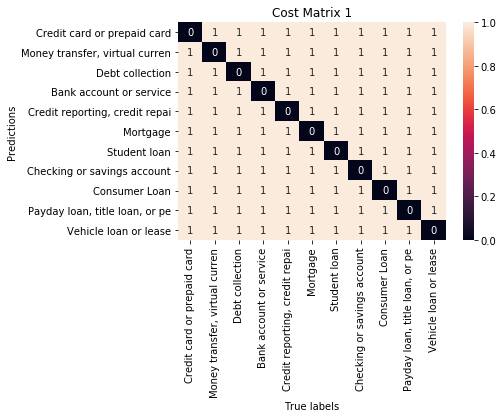

In [55]:
cost_matrix_1 = np.array([[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]])
plot_matrix(cost_matrix_1, 'Cost Matrix 1')
#11

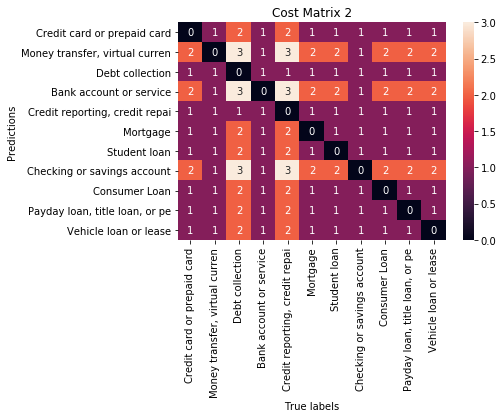

In [56]:
cost_matrix_2 = np.array([[0, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1],
                          [2, 0, 3, 1, 3, 2, 2, 1, 2, 2, 2],
                          [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
                          [2, 1, 3, 0, 3, 2, 2, 1, 2, 2, 2],
                          [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
                          [1, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1],
                          [1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1],
                          [2, 1, 3, 1, 3, 2, 2, 0, 2, 2, 2],
                          [1, 1, 2, 1, 2, 1, 1, 1, 0, 1, 1],
                          [1, 1, 2, 1, 2, 1, 1, 1, 1, 0, 1],
                          [1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0]])
plot_matrix(cost_matrix_2, 'Cost Matrix 2')
#13

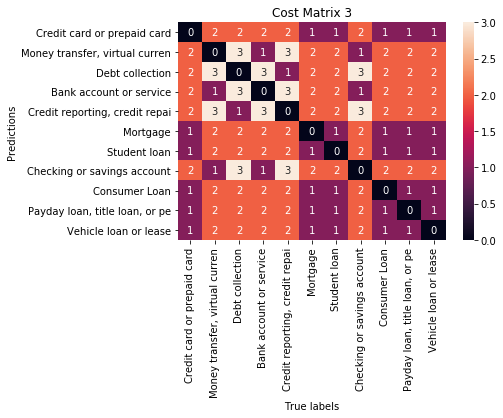

In [57]:
cost_matrix_3 = np.array([[0, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1],
                          [2, 0, 3, 1, 3, 2, 2, 1, 2, 2, 2],
                          [2, 3, 0, 3, 1, 2, 2, 3, 2, 2, 2],
                          [2, 1, 3, 0, 3, 2, 2, 1, 2, 2, 2],
                          [2, 3, 1, 3, 0, 2, 2, 3, 2, 2, 2],
                          [1, 2, 2, 2, 2, 0, 1, 2, 1, 1, 1],
                          [1, 2, 2, 2, 2, 1, 0, 2, 1, 1, 1],
                          [2, 1, 3, 1, 3, 2, 2, 0, 2, 2, 2],
                          [1, 2, 2, 2, 2, 1, 1, 2, 0, 1, 1],
                          [1, 2, 2, 2, 2, 1, 1, 2, 1, 0, 1],
                          [1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 0]])
plot_matrix(cost_matrix_3, 'Cost Matrix 3')

In [58]:
# Replace random_conf_mat with the confusion matrix you generated in the last question.

print("Cost with matrix 1: ", (random_conf_mat * cost_matrix_1).sum())
print("Cost with matrix 2: ", (random_conf_mat * cost_matrix_2).sum())
print("Cost with matrix 3: ", (random_conf_mat * cost_matrix_3).sum())

Cost with matrix 1:  68607
Cost with matrix 2:  121393
Cost with matrix 3:  132507


In [15]:
# Your answer here.
#if agent starts dealing with highest priority first and comes across a low priority complaint
#he will waste time in reading and correctly classifying low priority data
#but he will not waste time in solving the complaint, however, by the time he reaches low priority category, he has already
#prioritized all other complaints, at this point if he views a high priority complaint he has wasted a lot of time hence
#low priority getting misclssified as high priority leads to a little time and effort cost.
#but time cost of misclassifying high priority as low priority is very high.
#cost matrix 
#cost matrix 3 is better to compare models
# low priority has been misclassified the cost should still be low the agent wiill not work on solving it not in case of hig priority
